# Ultralytics YOLO12

Ultralytics YOLO12는 YOLO 시리즈의 최신 모델로, 기존의 CNN 기반 구조에서 벗어나 어텐션 메커니즘 중심의 아키텍처를 도입하여 정확도와 효율성을 동시에 향상시킨 모델입니다.

이 모델은 실시간 객체 탐지, 인스턴스 분할, 이미지 분류, 자세 추정, 방향 객체 탐지(OBB) 등 다양한 컴퓨터 비전 작업에 최적화되어 있습니다.

## YOLO12의 주요 특징

- 다양한 모델 크기 지원: YOLO12는 Nano(n), Small(s), Medium(m), Large(l), Extra-large(x) 등 다양한 크기의 모델을 제공하여, 경량화된 장치부터 고성능 서버까지 다양한 환경에 적합합니다.

- 다양한 비전 작업 지원: 객체 탐지, 인스턴스 분할, 이미지 분류, 자세 추정, 방향 객체 탐지 등 다양한 컴퓨터 비전 작업을 지원합니다.

- 높은 정확도와 효율성: YOLO12는 이전 버전인 YOLOv11보다 평균 정밀도(mAP)가 향상되었으며, 일부 모델에서는 YOLOv10 대비 최대 2.1%의 mAP 향상을 보였습니다

## YOLO12의 네트워크 구조

YOLO12의 아키텍처는 크게 세 부분으로 구성됩니다: **Backbone**, **Neck**, **HEad**.

각 구성 요소는 다음과 같은 특징을 가집니다.

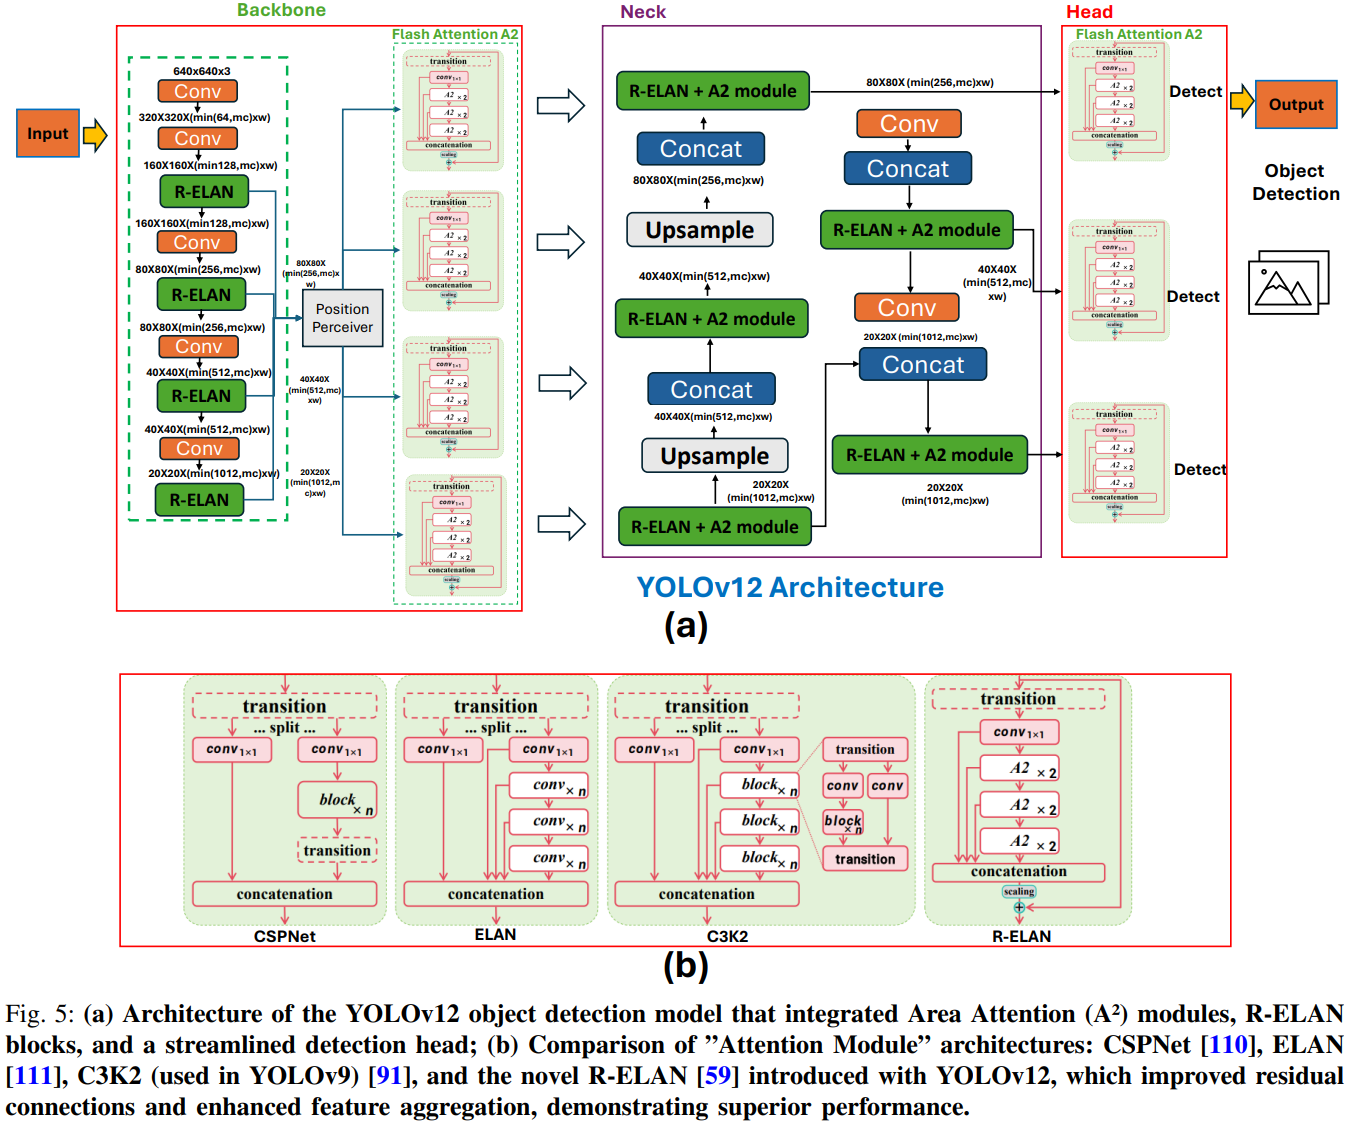

### 1. Backbone – R-ELAN (Residual Efficient Layer Aggregation Network)


YOLO12는 기존의 ELAN 구조를 개선한 R-ELAN을 도입하여 특징 추출의 효율성과 최적화 안정성을 향상시켰습니다.

R-ELAN은 블록 수준의 잔차 연결과 병목 구조를 통해 깊은 네트워크에서도 효과적인 학습이 가능하도록 설계되었습니다.

ELAN 구조
- YOLOv7: https://arxiv.org/pdf/2207.02696

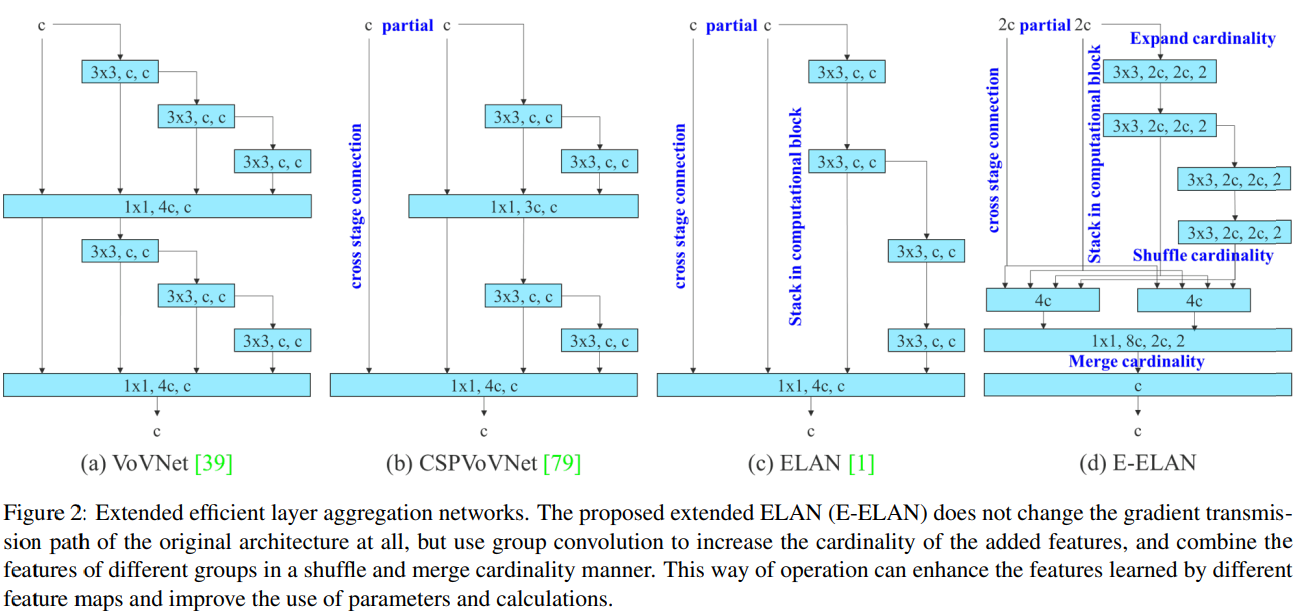

### 2. Neck – Area Attention Mechanism

Neck 부분에서는 Area Attention Mechanism을 도입하여, 특징 맵을 수평 또는 수직으로 나누어 각 영역에 집중하는 방식으로 연산 효율성을 높였습니다.

이 메커니즘은 복잡한 연산 없이도 넓은 수용 영역을 확보하여, 중요한 영역에 더 집중할 수 있도록 돕습니다

### 3. Head – 최적화된 주의 아키텍처

YOLO12의 Head는 다음과 같은 최적화를 통해 효율성과 정확도를 동시에 달성합니다:

- FlashAttention: 메모리 접근 오버헤드를 최소화하여 연산 속도를 향상시킵니다.

- 위치 인코딩 제거: 명시적인 위치 인코딩을 제거하여 모델을 간결하고 빠르게 만듭니다.

- MLP 비율 조정: Feed-Forward 네트워크의 확장 비율을 기존의 4에서 1.2 또는 2로 줄여 연산 효율성을 높입니다.

- 7x7 분리 컨볼루션: "Position Perceiver"로서 위치 정보를 암묵적으로 인코딩하여 성능을 향상시킵니다.

## YOLO11 vs YOLO12

YOLO11은 기존 YOLOv8 계열의 점진적 발전형으로, 경량화와 성능 향상을 동시에 이뤄 실시간성을 극대화한 모델입니다.

반면 YOLO12는 YOLO 시리즈에 Transformers 스타일의 어텐션 기법을 본격 도입하여 정확도의 큰 폭 향상을 노린 모델입니다.

YOLO12는 새로운 구조로 더 똑똑하게 특징을 추출하고자 하지만, 약간의 속도 희생이 따릅니다.

따라서 실제 적용시에는 요구사항에 따라 YOLO11을 선택해 최대의 속도를 취할지, YOLO12를 선택해 최고의 정확도를 취할지 고려해야 합니다.

두 모델 모두 Ultralytics 라이브러리에서 비슷한 사용 방식으로 제공됩니다.

## YOLOv12n 모델을 VOC dataset으로 훈련하기

### 1. 환경 설정 및 Ultralytics 설치

In [1]:
# Ultralytics 설치
!pip install ultralytics onnx onnxruntime-gpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 56.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 80.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.2/283.2 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 103.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 91.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2

In [2]:
# 버전 확인
import ultralytics
print(ultralytics.__version__)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
8.3.170


### 2. VOC 데이터셋 다운로드 및 준비

In [3]:
# VOC 데이터셋 다운로드
!pip install gdown
!gdown 1w_WBizEt2e_u6T9iY-hkwA-fIVsJktbB
!tar -xf VOCtrainval_11-May-2012.tar
!rm VOCtrainval_11-May-2012.tar

Failed to retrieve file url:

	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1w_WBizEt2e_u6T9iY-hkwA-fIVsJktbB

but Gdown can't. Please check connections and permissions.
tar: VOCtrainval_11-May-2012.tar: Cannot open: No such file or directory
tar: Error is not recoverable: exiting now
rm: cannot remove 'VOCtrainval_11-May-2012.tar': No such file or directory


In [4]:
# 데이터셋 구조 확인
!ls VOCdevkit/VOC2012/

ls: cannot access 'VOCdevkit/VOC2012/': No such file or directory


### 3. 데이터셋을 YOLO 형식으로 변환


실습하고 있는 데이터셋은 라벨링이 xml 파일 포맷으로 제공되며, 해당 포맷은 YOLOv7을 활용해 객체 인식 신경망을 훈련할 때 사용할 수 있는 파일 포맷이 아닙니다.

convert2Yolo라고 하는 깃허브 저장소에서 Pascal VOC 데이터셋의 xml 파일 형태를 YOLOv11을 통한 훈련에 사용할 수 있도록 변환하는 기능을 제공합니다. 이를 활용해 xml 파일 포맷을 txt 파일 포맷으로 변환하겠습니다.

이 과정에 앞서 다음과 같이 Pascal VOC 데이터셋의 클래스 리스트가 있는 파일을 생성합니다.

In [5]:
classes = ["aeroplane\n", "bicycle\n", "bird\n", "boat\n", "bottle\n",
           "bus\n", "car\n", "cat\n", "chair\n", "cow\n", "diningtable\n",
           "dog\n", "horse\n", "motorbike\n", "person\n", "pottedplant\n",
           "sheep\n", "sofa\n", "train\n", "tvmonitor"]
with open("vocnames.txt", 'w') as f:
    f.writelines(classes)

vocnames.txt 파일이 생성된 것을 확인한 후 다음과 같이 VOCdevkit/VOC2012 폴더 아래에 labels 폴더를 생성한 후 convert2Yolo 저장소를 활용해 xml 파일을 txt 파일로 변환합니다

In [6]:
!git clone https://github.com/ssaru/convert2Yolo.git
!cd convert2Yolo && python3 example.py --datasets VOC \
--img_path ../VOCdevkit/VOC2012/JPEGImages/ \
--label ../VOCdevkit/VOC2012/Annotations/ \
--convert_output_path ../VOCdevkit/VOC2012/JPEGImages/ \
--img_type ".jpg" \
--manifest_path ../ \
--cls_list_file ../vocnames.txt

Cloning into 'convert2Yolo'...
remote: Enumerating objects: 215, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 215 (delta 38), reused 35 (delta 35), pack-reused 172 (from 1)
Receiving objects: 100% (215/215), 994.67 KiB | 43.25 MiB/s, done.
Resolving deltas: 100% (95/95), done.
VOC Parsing Result : False, msg : ERROR : , moreInfo : <class 'StopIteration'>	Format.py	238


다운로드 완료 후 훈련을 위한 이미지가 있는 폴더의 경로는 아래와 같습니다.

/content/VOCdevkit/VOC2012/JPEGImages/

YOLOv11을 통한 객체 인식 신경망을 훈련하기 위해 각 이미지 내 객체의 위치가 라벨링되어 있는 텍스트 파일은 이미지와 같은 폴더에 있습니다.

YOLOv11에서 훈련할 때 이미지와 같은 경로에 이미지와 동일한 이름의 라벨링 된 텍스트 파일이 있어야만 훈련을 수행할 수 있습니다. 구체적인 파일 구조는 아래와 같습니다.

```
$Object_Detection_Dataset/
                         ┗ 1.png
                         ┗ 1.txt
                         ┗ 2.jpg
                         ┗ 2.txt
```

이제 데이터를 훈련 데이터와 검증 데이터로 나누겠습니다.

In [7]:
import os
import shutil
from tqdm import tqdm
data_root = "/content/VOCData"
val_root = os.path.join(data_root, "val")
train_root = os.path.join(data_root, "train")
os.makedirs(val_root, exist_ok=True)
os.makedirs(train_root, exist_ok=True)

with open("/content/manifest.txt") as f:
    files = f.readlines()

for idx, img_path in tqdm(enumerate(files)):
    img_src = img_path.split('\n')[0]
    txt_src = os.path.splitext(img_src)[0] + ".txt"
    img_name = os.path.split(img_src)[-1]
    text_name = os.path.split(txt_src)[-1]
    if idx % 10 < 3:
        img_dst = os.path.join(val_root, img_name)
        text_dst = os.path.join(val_root, text_name)
    else:
        img_dst = os.path.join(train_root, img_name)
        text_dst = os.path.join(train_root, text_name)
    shutil.copy2(img_src, img_dst)
    shutil.copy2(txt_src, text_dst)

FileNotFoundError: [Errno 2] No such file or directory: '/content/manifest.txt'

### 4. 데이터셋 구성 파일 생성

In [ ]:
text_lines = """path: /content/VOCData # dataset root dir
train: train # train images (relative to 'path')
val: val # val images (relative to 'path')
test: #optional

names:
  0: aeroplane
  1: bicycle
  2: bird
  3: boat
  4: bottle
  5: bus
  6: car
  7: cat
  8: chair
  9: cow
  10: diningtable
  11: dog
  12: horse
  13: motorbike
  14: person
  15: pottedplant
  16: sheep
  17: sofa
  18: train
  19: tvmonitor"""
with open("/content/vocdata.yaml", 'w') as f:
    f.write(text_lines)

### 5. YOLOv12n 모델 훈련

In [8]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo12n.pt")

# # Train the model
# train_results = model.train(
#     data="vocdata.yaml",  # path to dataset YAML
#     epochs=10,  # number of training epochs
#     imgsz=640,  # training image size
#     device=0,  # device to run on, i.e. device=0 or device=0,1,2,3 or device=cpu
#     batch=64,
#     name="yolov12n_voc",  # name of trained model
#     save_dir="runs/detect/yolov12n_voc"
# )


100%|██████████| 5.34M/5.34M [00:00<00:00, 326MB/s]


### 6. 모델 추론 및 시각화

100%|██████████| 49.2k/49.2k [00:00<00:00, 56.9MB/s]


image 1/1 /content/zidane.jpg: 384x640 2 persons, 1 tie, 61.5ms
Speed: 13.3ms preprocess, 61.5ms inference, 341.9ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict


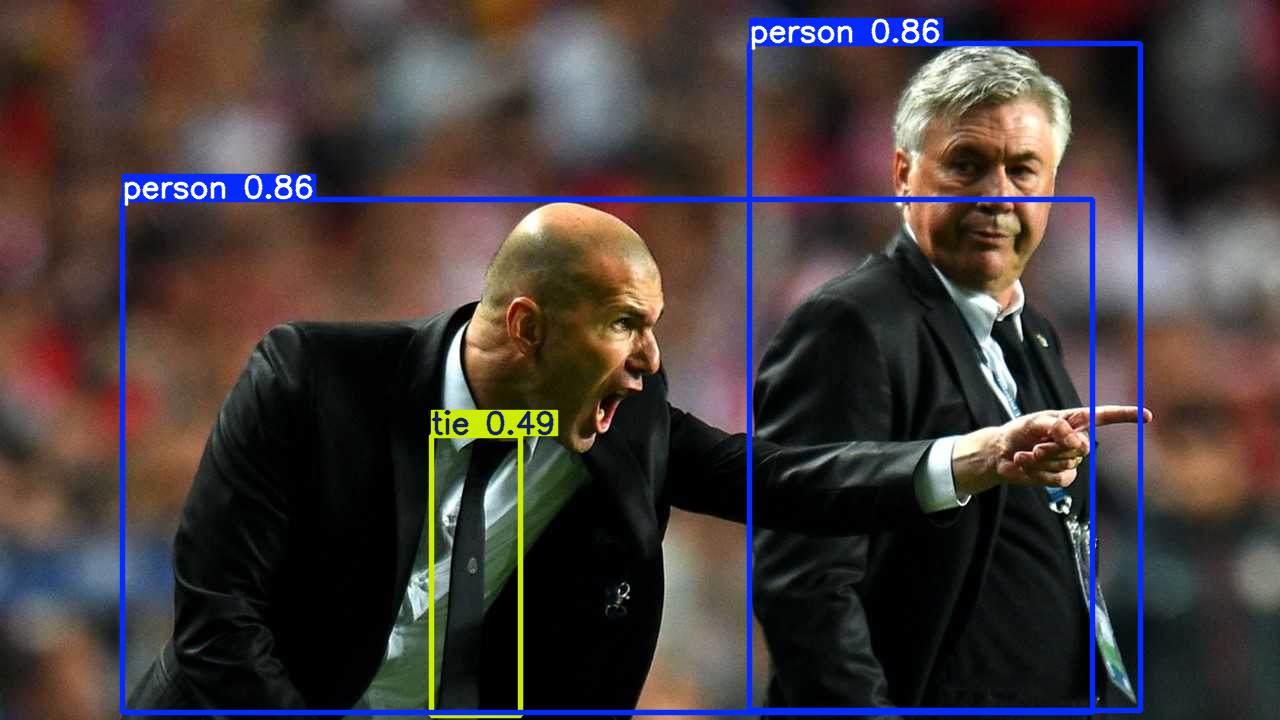

In [9]:
# 이미지 추론
results = model.predict(source='https://ultralytics.com/images/zidane.jpg', save=True)

# 결과 시각화
results[0].show()

### 7. 모델을 ONNX 형식으로 변환

In [ ]:
# ONNX로 모델 변환
model.export(format='onnx')

### 8. OpenCV 및 ONNX Runtime을 사용한 추론

In [ ]:
import cv2
import onnxruntime as ort
import numpy as np

# 1) 클래스 이름 로드
def get_class_names():
    class_names = [
        "aeroplane","bicycle","bird","boat","bottle","bus","car","cat","chair","cow",
        "diningtable","dog","horse","motorbike","person","pottedplant","sheep","sofa","train","tvmonitor"
    ]
    return class_names

# 2) ONNX Runtime 세션 생성
def get_session(model_path, providers=['CPUExecutionProvider', 'CUDAExecutionProvider']):
    session = ort.InferenceSession(model_path, providers=providers)
    input_name = session.get_inputs()[0].name  # 보통 'images'
    return session, input_name


# 3) 이미지 로드 및 전처리 (640×640 리사이즈, RGB, 정규화)
def preprocessing(image_path):
    orig_image = cv2.imread(image_path)
    orig_h, orig_w = orig_image.shape[:2]
    img = cv2.resize(orig_image, (640, 640))
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB).astype(np.float32) / 255.0
    input_tensor = np.transpose(img_rgb, (2, 0, 1))[None, ...]  # (1,3,640,640)
    return orig_image, orig_h, orig_w, input_tensor

# 4) 추론 실행
def inference_image(session, input_name, input_tensor):
    outputs = session.run(None, {input_name: input_tensor})
    return outputs[0] # outputs[0].shape == (1, C, N)  e.g. (1,24,8400)

# 5) 결과 후처리
def get_detection_output(outputs, object_threshold, iou_threshold):
    results = outputs.transpose()  # (N, C) -> (C, N)
    if len(results[0]) != 5:
        class_filtered_results = []
        for detection in results:
            class_id = detection[4:].argmax()
            confidence_score = detection[4:].max()
            new_detection = np.append(detection[:4],[class_id,confidence_score])
            class_filtered_results.append(new_detection)
        results = np.array(class_filtered_results)

    boxes = results[:, :4]  # [x1, y1, x2, y2]
    conf_scores = results[:, -1]  # confidence scores
    # 겹치는 박스 제거를 위한 NMS와 thresholding
    indices = cv2.dnn.NMSBoxes(boxes.tolist(), conf_scores.tolist(), score_threshold=object_threshold, nms_threshold=iou_threshold)

    if len(indices) == 0:
        return np.empty((0, 6))  # No detections after NMS
    return results[indices.flatten()]

# 6) 결과 시각화
def visualize(class_names, results, orig_image, orig_h, orig_w):
    result_image = orig_image.copy()
    cx, cy, w, h, class_id, confidence = results[:,0], results[:,1], results[:,2], results[:,3], results[:,4], results[:,-1]
    cx = cx/640.0 * orig_w
    cy = cy/640.0 * orig_h
    w = w/640.0 * orig_w
    h = h/640.0 * orig_h
    x1 = cx - w/2
    y1 = cy - h/2
    x2 = cx + w/2
    y2 = cy + h/2
    for box, class_idx, score in zip(zip(x1, y1, x2, y2), class_id, confidence):
        x1, y1, x2, y2 = box
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
        class_idx = int(class_idx)
        score = "{:.2f}".format(score)
        cv2.rectangle(result_image,(int(x1),int(y1)),(int(x2),int(y2)),(255,0, 0),1)
        cv2.putText(result_image,class_names[class_idx]+' '+score,(x1,y1-17),
                    cv2.FONT_HERSHEY_SIMPLEX,0.7,(255,0,0),1)
    return result_image

In [ ]:
model_path = 'runs/detect/yolov12n_voc/weights/best.onnx'
image_path = '/content/zidane.jpg'
object_threshold = 0.5
nms_threshold = 0.5
class_names = get_class_names()
session, input_name = get_session(model_path, ['CUDAExecutionProvider'])
orig_image, orig_h, orig_w, input_tensor = preprocessing(image_path)
outputs = inference_image(session, input_name, input_tensor)
detections = get_detection_output(outputs, object_threshold, nms_threshold)
result_image = visualize(class_names, detections, orig_image, orig_h, orig_w)
cv2.imwrite('result.jpg', result_image)